<a href="https://colab.research.google.com/github/ziyadshezoo/SF-Salaries-EDA/blob/main/SF_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

** Read Salaries.csv as a dataframe called sal.**

In [5]:
df=pd.read_csv('/content/Salaries.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87949 entries, 0 to 87948
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                87949 non-null  int64  
 1   EmployeeName      87949 non-null  object 
 2   JobTitle          87949 non-null  object 
 3   BasePay           87946 non-null  float64
 4   OvertimePay       87949 non-null  float64
 5   OtherPay          87948 non-null  float64
 6   Benefits          51789 non-null  float64
 7   TotalPay          87948 non-null  float64
 8   TotalPayBenefits  87948 non-null  float64
 9   Year              87948 non-null  float64
 10  Notes             0 non-null      float64
 11  Agency            87948 non-null  object 
 12  Status            0 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 8.7+ MB


** Check the head of the DataFrame. **

In [7]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN


**What is the average BasePay ?**

In [8]:
df.replace("Not Provided",np.nan,inplace=True)
df['BasePay'].replace(np.nan,0,inplace=True)
df['BasePay']

df['BasePay']=pd.to_numeric(df["BasePay"])
df['BasePay'].mean()

72474.6260446395

** What is the highest amount of OvertimePay in the dataset ? **

In [9]:
df['OvertimePay']=pd.to_numeric(df['OvertimePay'])
df['OvertimePay'].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [10]:
r=df[df['EmployeeName']=="JOSEPH DRISCOLL"].index
print(df.loc[r,"JobTitle"])


24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object


** How much does JOSEPH DRISCOLL make (including benefits)? **

In [11]:
print(df.loc[r,'TotalPay'])

24    270324.91
Name: TotalPay, dtype: float64


** What is the name of highest paid person (including benefits)?**

In [12]:
df[df["TotalPayBenefits"]==df.TotalPayBenefits.max()]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [13]:
df[df["TotalPayBenefits"]==df.TotalPayBenefits.min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.0,0.0,2011.0,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.0,0.0,2011.0,NaN,San Francisco,NaN
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.0,NaN,0.0,0.0,2011.0,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [14]:
# df.groupby('Year').mean()['BasePay']
df['Year']=df['Year'].astype(str)
df1=df.pivot_table('BasePay',columns="Year")
df1.mean(axis='index')

Year
2011.0     63595.956517
2012.0     65436.406857
2013.0    111069.812386
nan        67968.320000
dtype: float64

** How many unique job titles are there? **


In [15]:
df['JobTitle'].nunique()

2107

** What are the top 5 most common jobs? **

In [16]:
df['JobTitle'].value_counts().head(5)

Transit Operator    3007
TRANSIT OPERATOR    2388
Registered Nurse    2307
Police Officer 3    1568
Special Nurse       1536
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [17]:
sum(df[df['Year']==2013]['JobTitle'].value_counts()==1)

0

** How many people have the word Chief 

---

in their job title? (This is pretty tricky) **

In [18]:
def s(w):
  if 'chief' in w.lower():
    return True
  else:
    return False
sum(df['JobTitle'].apply(lambda x:s(x)))

458

 Is there a correlation between length of the Job Title string and Salary? **

In [19]:
df['title_len'] = df['JobTitle'].apply(len)
df[['title_len','TotalPayBenefits']].corr()

,title_len,TotalPayBenefits
title_len,1.00000,-0.05226
TotalPayBenefits,-0.05226,1.00000


In [31]:
df['JobTitle']=df['JobTitle'].str.lower()

# **Visualization**

In [21]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,title_len
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN,46
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN,31
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN,31
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN,36
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN,44


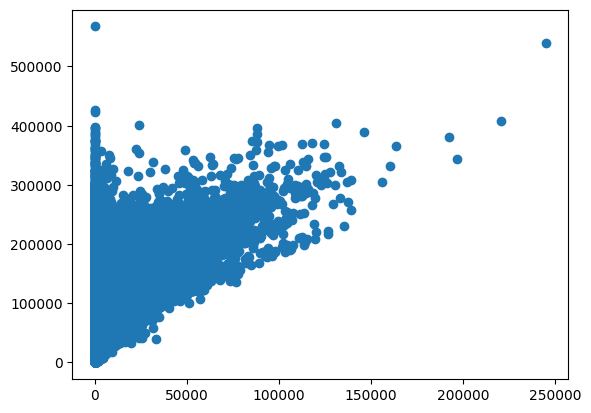

In [23]:
plt.scatter(df['OvertimePay'],df['TotalPayBenefits'])

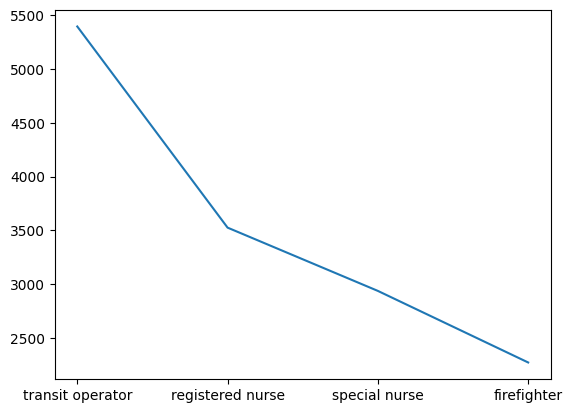

In [37]:
plt.plot(df['JobTitle'].value_counts().head(4))
